<a href="https://www.kaggle.com/code/amirmotefaker/pytorch-vs-numpy?scriptVersionId=185261069" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# NOTE

At its core, [PyTorch](https://pytorch.org/) provides two main features:

- An n-dimensional Tensor, similar to [NumPy](https://numpy.org/) but can run on GPUs

- Automatic differentiation for building and training neural networks

We will use a problem of fitting y=sin(x) with a third-order polynomial as our running example. The network will have four parameters and will be trained with gradient descent to fit random data by minimizing the [Euclidean distance](https://www.cuemath.com/euclidean-distance-formula/) between the network output and the true output.

# Pytorch vs Numpy

- Pytorch tensors are similar to numpy arrays, but can also be operated on CUDA-capable Nvidia GPU. Numpy arrays are mainly used in typical machine learning algorithms (such as k-means or Decision Tree in scikit-learn) whereas pytorch tensors are mainly used in deep learning which requires heavy matrix computation.

- The numpy arrays are the core functionality of the numpy package designed to support faster mathematical operations. Unlike python’s inbuilt list data structure, they can only hold elements of a single data type. Library like pandas which is used for data preprocessing is built around the numpy array. Pytorch tensors are similar to numpy arrays, but can also be operated on CUDA-capable Nvidia GPU.

- Numpy arrays are mainly used in typical machine learning algorithms (such as k-means or Decision Tree in scikit-learn) whereas pytorch tensors are mainly used in deep learning which requires heavy matrix computation.

- Unlike numpy arrays, while creating pytorch tensor, it also accepts two other arguments called the device_type (whether the computation happens on CPU or GPU) and the requires_grad (which is used to compute the derivatives).

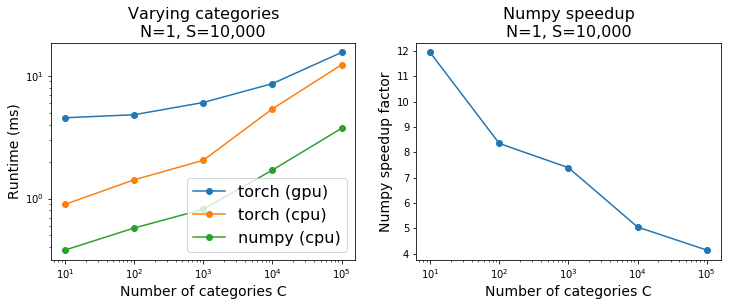

# NumPy

- NumPy provides an n-dimensional array object and many functions for manipulating these arrays. Numpy is a generic framework for scientific computing; it does not know anything about computation graphs, or deep learning, or gradients. However, we can easily use numpy to fit a third-order polynomial to a sine function by manually implementing the forward and backward passes through the network using numpy operations.

In [1]:
import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 707.7517337731379
199 487.1973472899075
299 336.6169377706374
399 233.6921799325217
499 163.2600923863263
599 115.00754634024248
699 81.91216655265589
799 59.18688183522856
899 43.56467491756602
999 32.81335671484332
1099 25.406030319668176
1199 20.29704253230993
1299 16.769484844418614
1399 14.331277316851471
1499 12.644277195519013
1599 11.475861527929208
1699 10.665821058522338
1799 10.103697396153263
1899 9.71325131689223
1999 9.441806121356331
Result: y = -0.023420387862296353 + 0.8454432781050626 x + 0.004040406623182339 x^2 + -0.09172340880385947 x^3


# PyTorch

- Numpy is a great framework, but it cannot utilize GPUs to accelerate its numerical computations. For modern deep neural networks, GPUs often provide speedups of 50x or greater, so unfortunately numpy won’t be enough for modern deep learning.

- Here we introduce the most fundamental PyTorch concept: the Tensor. A PyTorch Tensor is conceptually identical to a numpy array: a Tensor is an n-dimensional array, and PyTorch provides many functions for operating on these Tensors. Behind the scenes, Tensors can keep track of a computational graph and gradients, but they’re also useful as a generic tool for scientific computing.

- Also unlike numpy, PyTorch Tensors can utilize GPUs to accelerate their numeric computations. To run a PyTorch Tensor on GPU, you simply need to specify the correct device.

- Here we use PyTorch Tensors to fit a third-order polynomial to a sine function. Like the numpy example above we need to manually implement the forward and backward passes through the network.

In [2]:
import torch
import math


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 2025.772216796875
199 1342.82958984375
299 891.1461181640625
399 592.4080810546875
499 394.82330322265625
599 264.13916015625
699 177.7022705078125
799 120.53014373779297
899 82.71411895751953
999 57.700477600097656
1099 41.15456771850586
1199 30.209793090820312
1299 22.969770431518555
1399 18.180341720581055
1499 15.011895179748535
1599 12.915823936462402
1699 11.529053688049316
1799 10.611565589904785
1899 10.004538536071777
1999 9.602892875671387
Result: y = 0.0031878005247563124 + 0.8296502232551575 x + -0.0005499481922015548 x^2 + -0.08947698026895523 x^3


# PyTorch: Tensors and autograd

- We can use [automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation) to automate the computation of backward passes in neural networks. The autograd package in PyTorch provides exactly this functionality. When using autograd, the forward pass of your network will define a computational graph; nodes in the graph will be Tensors, and edges will be functions that produce output Tensors from input Tensors. Backpropagating through this graph then allows you to easily compute gradients.

- This sounds complicated, it’s pretty simple to use in practice. Each Tensor represents a node in a computational graph. If x is a Tensor that has x.requires_grad=True then x.grad is another Tensor holding the gradient of x with respect to some scalar value.

- Here we use PyTorch Tensors and autograd to implement our fitting sine wave with third order polynomial example; now we no longer need to manually implement the backward pass through the network:

In [3]:
import torch
import math

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 316.0363464355469
199 215.45249938964844
299 147.92274475097656
399 102.54716491699219
499 72.0320053100586
599 51.492374420166016
699 37.65492630004883
799 28.324081420898438
899 22.02604103088379
999 17.77081871032715
1099 14.892977714538574
1199 12.944595336914062
1299 11.624131202697754
1399 10.728256225585938
1499 10.119773864746094
1599 9.70605754852295
1699 9.424432754516602
1799 9.232515335083008
1899 9.10157299041748
1999 9.012137413024902
Result: y = 0.010863021947443485 + 0.8659447431564331 x + -0.0018740530358627439 x^2 + -0.09463956207036972 x^3


# PyTorch: Defining new autograd functions

- Under the hood, each primitive autograd operator is really two functions that operate on Tensors. The forward function computes output Tensors from input Tensors. The backward function receives the gradient of the output Tensors with respect to some scalar value and computes the gradient of the input Tensors with respect to that same scalar value.

- In PyTorch we can easily define our own autograd operator by defining a subclass of torch.autograd.Function and implementing the forward and backward functions. We can then use our new autograd operator by constructing an instance and calling it like a function, passing Tensors containing input data.

- In this example, we define our model as a [Legendre polynomial](https://en.wikipedia.org/wiki/Legendre_polynomials).

In [4]:
import torch
import math


class LegendrePolynomial3(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        ctx.save_for_backward(input)
        return 0.5 * (5 * input ** 3 - 3 * input)

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = ctx.saved_tensors
        return grad_output * 1.5 * (5 * input ** 2 - 1)


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For this example, we need
# 4 weights: y = a + b * P3(c + d * x), these weights need to be initialized
# not too far from the correct result to ensure convergence.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

learning_rate = 5e-6
for t in range(2000):
    # To apply our Function, we use Function.apply method. We alias this as 'P3'.
    P3 = LegendrePolynomial3.apply

    # Forward pass: compute predicted y using operations; we compute
    # P3 using our custom autograd operation.
    y_pred = a + b * P3(c + d * x)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)')

99 209.95834350585938
199 144.66018676757812
299 100.70249938964844
399 71.03519439697266
499 50.97850799560547
599 37.403133392333984
699 28.206867218017578
799 21.97318458557129
899 17.7457275390625
999 14.877889633178711
1099 12.93176555633545
1199 11.610918998718262
1299 10.71425724029541
1399 10.10548210144043
1499 9.692106246948242
1599 9.411375045776367
1699 9.220745086669922
1799 9.091285705566406
1899 9.003360748291016
1999 8.943639755249023
Result: y = -5.394172664097141e-09 + -2.208526849746704 * P3(1.367587154632588e-09 + 0.2554861009120941 x)


# PyTorch: nn module

- Computational graphs and autograd are very powerful paradigms for defining complex operators and automatically taking derivatives; however, for large neural networks raw autograd can be a bit too low-level.

- When building neural networks we frequently think of arranging the computation into layers, some of which have learnable parameters which will be optimized during learning.

- In TensorFlow, packages like [Keras](https://github.com/fchollet/keras), [TensorFlow-Slim](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/contrib/slim), and [TFLearn](http://tflearn.org/) provide higher-level abstractions over raw computational graphs that are useful for building neural networks.

- In PyTorch, the nn package serves this same purpose. The nn package defines a set of Modules, which are roughly equivalent to neural network layers. A Module receives input Tensors and computes output Tensors, but may also hold an internal state such as Tensors containing learnable parameters. The nn package also defines a set of useful loss functions that are commonly used when training neural networks.

In [5]:
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 859.3888549804688
199 572.32177734375
299 382.187744140625
399 256.2414245605469
499 172.80352783203125
599 117.52000427246094
699 80.88582611083984
799 56.60626983642578
899 40.51231384277344
999 29.842546463012695
1099 22.767616271972656
1199 18.075424194335938
1299 14.962926864624023
1399 12.897841453552246
1499 11.527414321899414
1599 10.617740631103516
1699 10.013740539550781
1799 9.612600326538086
1899 9.346126556396484
1999 9.169054985046387
Result: y = 0.00600012531504035 + 0.8393583297729492 x + -0.001035121618770063 x^2 + -0.09085787832736969 x^3


# PyTorch: optimal

- Up to this point, we have updated the weights of our models by manually mutating the Tensors holding learnable parameters with torch.no_grad(). This is not a huge burden for simple optimization algorithms like stochastic gradient descent, but in practice, we often train neural networks using more sophisticated optimizers like AdaGrad, RMSProp, Adam, etc.

- The optimal package in PyTorch abstracts the idea of an optimization algorithm and provides implementations of commonly used optimization algorithms.

- In this example, we will use the nn package to define our model as before, but we will optimize the model using the RMSprop algorithm provided by the optim package:

In [6]:
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()


linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 3228.5224609375
199 2336.0205078125
299 2022.4791259765625
399 1740.9359130859375
499 1485.110595703125
599 1254.9326171875
699 1048.41064453125
799 863.702880859375
899 699.5157470703125
999 554.863037109375
1099 429.1241760253906
1199 321.68927001953125
1299 232.27981567382812
1399 159.51171875
1499 103.16246032714844
1599 61.983192443847656
1699 34.51436996459961
1799 18.56957244873047
1899 11.330732345581055
1999 9.212215423583984
Result: y = 0.0005003543337807059 + 0.8396323919296265 x + 0.0005003548576496542 x^2 + -0.09139608591794968 x^3


# PyTorch: Custom nn Modules

- Sometimes you will want to specify models that are more complex than a sequence of existing Modules; for these cases, you can define your own Modules by subclassing nn.Module and defining a forward which receives input Tensors and produces output Tensors using other modules or other autograd operations on Tensors.

  In this example we implement our third order polynomial as a custom Module subclass:

In [7]:
import torch
import math


class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'

# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = Polynomial3()

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters (defined 
# with torch.nn.Parameter) which are members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
for t in range(2000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

99 99.56904602050781
199 73.03668212890625
299 54.262420654296875
399 40.976722717285156
499 31.575027465820312
599 24.921863555908203
699 20.213726043701172
799 16.881999969482422
899 14.524277687072754
999 12.855826377868652
1099 11.675146102905273
1199 10.839632987976074
1299 10.248373031616211
1399 9.82996654510498
1499 9.5338773727417
1599 9.32435131072998
1699 9.176078796386719
1799 9.07115364074707
1899 8.99690055847168
1999 8.944356918334961
Result: y = 0.011937485076487064 + 0.8567265868186951 x + -0.002059416612610221 x^2 + -0.09332836419343948 x^3


# PyTorch: Control Flow + Weight Sharing

- As an example of dynamic graphs and weight sharing, we implement a very strange model: a third-fifth order polynomial that on each forward pass chooses a random number between 3 and 5 and uses that many orders, reusing the same weights multiple times to compute the fourth and fifth order.

- For this model, we can use normal Python flow control to implement the loop, and we can implement weight sharing by simply reusing the same parameter multiple times when defining the forward pass.

- We can easily implement this model as a Module subclass:

In [8]:
import random
import torch
import math


class DynamicNet(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate five parameters and assign them as members.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
        self.e = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        For the forward pass of the model, we randomly choose either 4, 5
        and reuse the e parameter to compute the contribution of these orders.

        Since each forward pass builds a dynamic computation graph, we can use normal
        Python control-flow operators like loops or conditional statements when
        defining the forward pass of the model.

        Here we also see that it is perfectly safe to reuse the same parameter many
        times when defining a computational graph.
        """
        y = self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
        for exp in range(4, random.randint(4, 6)):
            y = y + self.e * x ** exp
        return y

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3 + {self.e.item()} x^4 ? + {self.e.item()} x^5 ?'


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = DynamicNet()

# Construct our loss function and an Optimizer. Training this strange model with
# vanilla stochastic gradient descent is tough, so we use momentum
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-8, momentum=0.9)
for t in range(30000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 2000 == 1999:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

1999 609.4874267578125
3999 271.4329833984375
5999 125.46263122558594
7999 68.2289810180664
9999 42.25364685058594
11999 23.03142547607422
13999 14.041876792907715
15999 12.099075317382812
17999 10.460145950317383
19999 9.674179077148438
21999 9.328961372375488
23999 8.630231857299805
25999 8.598714828491211
27999 8.933418273925781
29999 8.85439682006836
Result: y = 0.004379953257739544 + 0.8600046634674072 x + -0.0013347385684028268 x^2 + -0.09399591386318207 x^3 + 0.00011306694796076044 x^4 ? + 0.00011306694796076044 x^5 ?
